In [1]:
library(GO.db)
library(topGO)
library(org.Sc.sgd.db)

Loading required package: AnnotationDbi
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colnames, do.call,
    duplicated, eval, evalq, Filter, Find, get, grep, grepl, intersect,
    is.unsorted, lapply, lengths, Map, mapply, match, mget, order,
    paste, pmax, pmax.int, pmin, pmin.int, Position, rank, rbind,
    Reduce, rownames, sapply, setdiff, sort, table, tapply, union,
    unique, unsplit, which, which.max, which.min

Loading required package: Biobase
Welcome to Bioconductor

 

In [1]:
setwd('/home/david/Documents/ghsom')
allGenes <- read.table("Y2H_union.txt")$V1
allGenes <- unique(allGenes)
length(allGenes)

[1] 1337

In [3]:
setwd('/home/david/Documents/ghsom')
myInterestingGenes <- read.table("community_one.txt")$V1
myInterestingGenes

[1] YJR058C  YHR105W  YBR135W  YBR160W  YNL037C  YGL156W  YJL138C  YBR254C 
  [9] YLR102C  YOR379C  YIR018W  YOR136W  YPL128C  YKR059W  YHR112C  YPL280W 
 [17] YML042W  YDR421W  YOR155C  YHR113W  YNL044W  YLR021W  YJR021C  YLR347C 
 [25] YFL010C  YMR096W  YDL164C  YDR027C  YML108W  YGL015C  YLR442C  YNL098C 
 [33] YFL059W  YDL066W  YFL017WA YCL033C  YIL053W  YBR176W  YMR322C  YER062C 
 [41] YMR276W  YPL201C  YKL090W  YDR256C  YPL091W  YLR245C  YMR218C  YDR122W 
 [49] YGL213C  YMR308C  YOR097C  YGL071W  YGR024C  YHR156C  YNL334C  YNL316C 
 [57] YPL088W  YGL037C  YKL103C  YBL037W  YGL175C  YIL119C  YLR315W  YOL145C 
 [65] YHL009C  YNL222W  YDR189W  YGR108W  YKR068C  YFL039C  YGR144W  YIL051C 
 [73] YPL125W  YGL187C  YDR244W  YJR052W  YBR107C  YPR054W  YPR049C  YDR502C 
 [81] YBL057C  YPR062W  YHR039C  YOR391C  YDR480W  YMR033W  YJR112W  YBR252W 
 [89] YGR058W  YPR193C  YOR115C  YPL110C  YGR267C  YOL082W  YNL138W  YDR472W 
 [97] YGR179C  YPL251W  YFL029C  YJL199C  YML077W  YMR092C  YIL082W  YPR160W 
[105] YLR377C  YNL107W  YOR380W  YFL060C  YJL104W  YJL103C  YHL018W  YOR095C 
[113] YOL054W  YDR518W  YLR319C  YNL153C  YJR010W  YLR026C  YMR095C 
119 Levels: YBL037W YBL057C YBR107C YBR135W YBR160W YBR176W YBR252W ... YPR193C

In [5]:
geneList <- factor(as.integer(allGenes %in% myInterestingGenes))
# names(geneList) <- ensembl2GO[allGenes]
# names(geneList) <- ensembl2ORF[allGenes]
names(geneList) <- allGenes
geneList

MEL1    Q0085    TORF1   TORF19   TORF21   TORF47  YAL005C  YAL012W 
       0        0        0        0        0        0        0        0 
 YAL016W  YAL020C  YAL021C  YAL024C  YAL027W  YAL028W  YAL032C YAL034WA 
       0        0        0        0        0        0        0        0 
 YAL036C  YAL040C  YAL041W YAL044WA  YAL046C  YAL049C  YAL054C  YAL055W 
       0        0        0        0        0        0        0        0 
 YAL060W  YAL062W  YAR003W  YAR007C  YAR014C  YAR018C  YAR027W  YAR028W 
       0        0        0        0        0        0        0        0 
 YAR031W  YAR033W  YAR035W  YAR066W  YBL001C  YBL006C  YBL007C  YBL010C 
       0        0        0        0        0        0        0        0 
 YBL014C  YBL016W  YBL020W  YBL021C  YBL023C  YBL025W  YBL026W  YBL033C 
       0        0        0        0        0        0        0        0 
 YBL035C  YBL037W  YBL039C  YBL042C  YBL043W  YBL045C  YBL046W  YBL047C 
       0        1        0        0        0        0        0        0 
 YBL051C  YBL056W  YBL057C  YBL058W  YBL060W  YBL068W  YBL069W  YBL077W 
       0        0        1        0        0        0        0        0 
 YBL078C  YBL081W  YBL091C YBL091CA  YBL093C  YBL101C YBL101WA  YBL102W 
       0        0        0        0        0        0        0        0 
 YBL105C  YBR006W  YBR019C  YBR029C  YBR030W  YBR034C  YBR038W  YBR040W 
       0        0        0        0        0        0        0        0 
 YBR041W  YBR042C  YBR052C  YBR055C  YBR056W  YBR057C  YBR059C  YBR072W 
       0        0        0        0        0        0        0        0 
 YBR077C  YBR080C  YBR087W  YBR088C  YBR094W  YBR102C  YBR103W  YBR107C 
       0        0        0        0        0        0        0        1 
 YBR108W  YBR109C  YBR111C  YBR122C  YBR123C  YBR125C  YBR126C YBR126WA 
       0        0        0        0        0        0        0        0 
 YBR130C  YBR131W  YBR133C  YBR134W  YBR135W  YBR137W  YBR141C  YBR150C 
       0        0        0        0        1        0        0        0 
 YBR152W  YBR153W  YBR154C  YBR155W  YBR156C YBR162WA  YBR166C  YBR170C 
       0        0        0        0        0        0        0        0 
 YBR176W  YBR182C  YBR186W  YBR187W  YBR188C  YBR190W  YBR193C  YBR194W 
       1        0        0        0        0        0        0        0 
 YBR195C  YBR196C  YBR198C  YBR200W  YBR201W  YBR205W  YBR212W  YBR216C 
       0        0        0        0        0        0        0        0 
 YBR217W  YBR221C  YBR222C  YBR223C  YBR228W  YBR233W  YBR234C  YBR237W 
       0        0        0        0        0        0        0        0 
 YBR239C  YBR241C  YBR242W  YBR243C  YBR244W  YBR246W  YBR247C  YBR249C 
       0        0        0        0        0        0        0        0 
 YBR252W  YBR253W  YBR254C  YBR255W  YBR260C  YBR261C  YBR264C  YBR270C 
       1        0        1        0        0        0        0        0 
 YBR273C  YBR274W  YBR276C  YBR278W  YBR279W  YBR281C  YBR284W  YBR288C 
       0        0        0        0        0        0        0        0 
 YBR289W  YCL010C  YCL019W  YCL020W YCL021WA  YCL024W  YCL028W  YCL029C 
       0        0        0        0        0        0        0        0 
 YCL032W  YCL033C  YCL039W  YCL040W  YCL046W  YCL054W  YCL055W  YCL056C 
       0        1        0        0        0        0        0        0 
 YCL059C  YCL063W  YCL066W  YCR004C  YCR005C  YCR007C  YCR009C  YCR011C 
       0        0        0        0        0        0        0        0 
 YCR020C YCR020CA  YCR021C  YCR022C  YCR023C  YCR024C  YCR027C  YCR035C 
       0        0        0        0        0        0        0        0 
 YCR036W  YCR045C  YCR050C  YCR051W  YCR052W  YCR057C  YCR059C  YCR060W 
       0        0        0        0        0        0        0        0 
 YCR063W  YCR065W  YCR066W  YCR067C  YCR068W  YCR073C  YCR076C  YCR077C 
       0        0        0        0        0        0        0        0 
 YCR082W  YCR083W  YCR086W YCR087CA  YCR088W  YCR093W  YCR095C

In [6]:
GOdata <- new("topGOdata", description="Practice GOData object UNION", ontology = "BP", allGenes = geneList,
              annotationFun = annFUN.org, mapping = "org.Sc.sgd.db", ID = "ENSEMBL", nodeSize = 10)
GOdata


Building most specific GOs .....
	( 1567 GO terms found. )

Build GO DAG topology ..........
	( 3506 GO terms and 7914 relations. )

Annotating nodes ...............
	( 1276 genes annotated to the GO terms. )



------------------------- topGOdata object -------------------------

 Description:
   -  Practice GOData object UNION 

 Ontology:
   -  BP 

 1337 available genes (all genes from the array):
   - symbol:  MEL1 Q0085 TORF1 TORF19 TORF21  ...
   - 83  significant genes. 

 1276 feasible genes (genes that can be used in the analysis):
   - symbol:  Q0085 YAL005C YAL012W YAL016W YAL020C  ...
   - 81  significant genes. 

 GO graph (nodes with at least  10  genes):
   - a graph with directed edges
   - number of nodes = 874 
   - number of edges = 1832 

------------------------- topGOdata object -------------------------


In [7]:
resultFisher <- runTest(GOdata, algorithm = "classic", statistic = "fisher")
resultFisher


			 -- Classic Algorithm -- 

		 the algorithm is scoring 613 nontrivial nodes
		 parameters: 
			 test statistic: fisher



Description: Practice GOData object UNION 
Ontology: BP 
'classic' algorithm with the 'fisher' test
874 GO terms scored: 21 terms with p < 0.01
Annotation data:
    Annotated genes: 1276 
    Significant genes: 81 
    Min. no. of genes annotated to a GO: 10 
    Nontrivial nodes: 613 

In [8]:
resultFisher.elim <- runTest(GOdata, algorithm = "elim", statistic = "fisher")
resultFisher.elim


			 -- Elim Algorithm -- 

		 the algorithm is scoring 613 nontrivial nodes
		 parameters: 
			 test statistic: fisher
			 cutOff: 0.01

	 Level 14:	2 nodes to be scored	(0 eliminated genes)

	 Level 13:	6 nodes to be scored	(0 eliminated genes)

	 Level 12:	9 nodes to be scored	(0 eliminated genes)

	 Level 11:	17 nodes to be scored	(0 eliminated genes)

	 Level 10:	30 nodes to be scored	(0 eliminated genes)

	 Level 9:	56 nodes to be scored	(0 eliminated genes)

	 Level 8:	67 nodes to be scored	(0 eliminated genes)

	 Level 7:	79 nodes to be scored	(0 eliminated genes)

	 Level 6:	105 nodes to be scored	(53 eliminated genes)

	 Level 5:	115 nodes to be scored	(91 eliminated genes)

	 Level 4:	80 nodes to be scored	(108 eliminated genes)

	 Level 3:	34 nodes to be scored	(256 eliminated genes)

	 Level 2:	12 nodes to be scored	(256 eliminated genes)

	 Level 1:	1 nodes to be scored	(256 eliminated genes)



Description: Practice GOData object UNION 
Ontology: BP 
'elim' algorithm with the 'fisher : 0.01' test
874 GO terms scored: 9 terms with p < 0.01
Annotation data:
    Annotated genes: 1276 
    Significant genes: 81 
    Min. no. of genes annotated to a GO: 10 
    Nontrivial nodes: 613 

In [9]:
allRes <- GenTable(GOdata, classicFisher = resultFisher,
                   elimFisher = resultFisher.elim,
                   orderBy = "classicFisher", ranksOf = "elimFisher", topNodes = 10)
allRes

GO.ID,Term,Annotated,Significant,Expected,Rank in elimFisher,classicFisher,elimFisher
GO:0009110,vitamin biosynthetic process,19,8,1.21,607,8.0e-06,1.0000
GO:0042364,water-soluble vitamin biosynthetic proce...,19,8,1.21,1,8.0e-06,8.0e-06
GO:0072525,pyridine-containing compound biosyntheti...,16,7,1.02,2,2.3e-05,2.3e-05
GO:0006766,vitamin metabolic process,23,8,1.46,608,4.2e-05,1.0000
GO:0006767,water-soluble vitamin metabolic process,23,8,1.46,609,4.2e-05,1.0000
GO:0072528,pyrimidine-containing compound biosynthe...,18,7,1.14,3,5.8e-05,5.8e-05
GO:0044281,small molecule metabolic process,218,28,13.84,8,6.2e-05,0.0066
GO:0044272,sulfur compound biosynthetic process,13,6,0.83,4,6.5e-05,6.5e-05
GO:0072527,pyrimidine-containing compound metabolic...,20,7,1.27,610,0.00013,1.0000
GO:0009108,coenzyme biosynthetic process,35,9,2.22,5,0.00020,0.0002


Loading required package: Rgraphviz
Loading required package: grid

Attaching package: ‘grid’

The following object is masked from ‘package:topGO’:

    depth


Attaching package: ‘Rgraphviz’

The following objects are masked from ‘package:IRanges’:

    from, to

The following objects are masked from ‘package:S4Vectors’:

    from, to



$dag
A graphNEL graph with directed edges
Number of Nodes = 29 
Number of Edges = 52 

$complete.dag
[1] "A graph with 29 nodes."


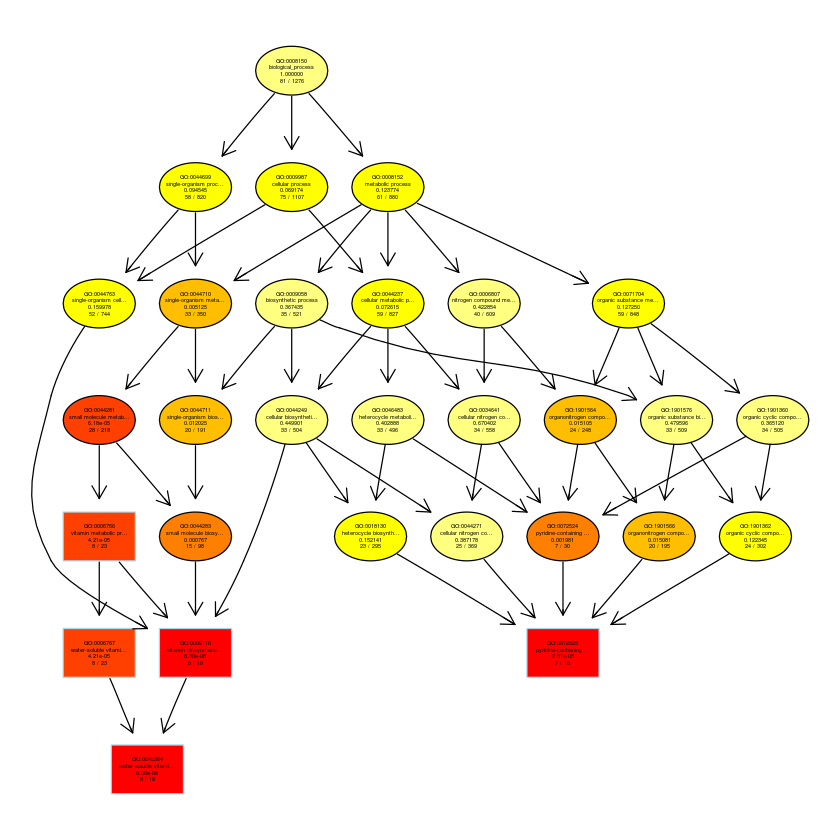

In [10]:
showSigOfNodes(GOdata, score(resultFisher), firstSigNodes = 5, useInfo ='all')

In [11]:
graph(GOdata)

A graphNEL graph with directed edges
Number of Nodes = 874 
Number of Edges = 1832 

In [4]:
setwd('/home/david/Documents/ghsom')
myInterestingGenes2 <- read.table("community_two.txt")$V1
myInterestingGenes2

[1] YJL155C  YNR046W  YBR190W  YDL238C  YBL051C  YLR257W  YJR047C  YIL151C 
 [9] YIR015W  YLR322W  YJR046W  YBL101WA YDR488C  YLR121C  YLR465C  YLR321C 
[17] YIR037W  YHR129C  YLR345W  YJL162C  YLR216C  YLR389C  YBR221C  YDR106W 
[25] YML035C  YEL034W  YJL070C  YMR168C  YBR111C  YKR096W  YIL132C  YLR376C 
[33] YLR117C  YDR504C  YHR068W  YDL111C  YBR175W  YBR284W  YBR244W  YAR003W 
[41] YDR140W  YJR008W  YDR424C  YGR158C  YPL070W 
45 Levels: YAR003W YBL051C YBL101WA YBR111C YBR175W YBR190W YBR221C ... YPL070W

In [12]:
geneList2 <- factor(as.integer(allGenes %in% myInterestingGenes2))
# names(geneList) <- ensembl2GO[allGenes]
# names(geneList) <- ensembl2ORF[allGenes]
names(geneList2) <- allGenes
geneList2

MEL1    Q0085    TORF1   TORF19   TORF21   TORF47  YAL005C  YAL012W 
       0        0        0        0        0        0        0        0 
 YAL016W  YAL020C  YAL021C  YAL024C  YAL027W  YAL028W  YAL032C YAL034WA 
       0        0        0        0        0        0        0        0 
 YAL036C  YAL040C  YAL041W YAL044WA  YAL046C  YAL049C  YAL054C  YAL055W 
       0        0        0        0        0        0        0        0 
 YAL060W  YAL062W  YAR003W  YAR007C  YAR014C  YAR018C  YAR027W  YAR028W 
       0        0        1        0        0        0        0        0 
 YAR031W  YAR033W  YAR035W  YAR066W  YBL001C  YBL006C  YBL007C  YBL010C 
       0        0        0        0        0        0        0        0 
 YBL014C  YBL016W  YBL020W  YBL021C  YBL023C  YBL025W  YBL026W  YBL033C 
       0        0        0        0        0        0        0        0 
 YBL035C  YBL037W  YBL039C  YBL042C  YBL043W  YBL045C  YBL046W  YBL047C 
       0        0        0        0        0        0        0        0 
 YBL051C  YBL056W  YBL057C  YBL058W  YBL060W  YBL068W  YBL069W  YBL077W 
       1        0        0        0        0        0        0        0 
 YBL078C  YBL081W  YBL091C YBL091CA  YBL093C  YBL101C YBL101WA  YBL102W 
       0        0        0        0        0        0        1        0 
 YBL105C  YBR006W  YBR019C  YBR029C  YBR030W  YBR034C  YBR038W  YBR040W 
       0        0        0        0        0        0        0        0 
 YBR041W  YBR042C  YBR052C  YBR055C  YBR056W  YBR057C  YBR059C  YBR072W 
       0        0        0        0        0        0        0        0 
 YBR077C  YBR080C  YBR087W  YBR088C  YBR094W  YBR102C  YBR103W  YBR107C 
       0        0        0        0        0        0        0        0 
 YBR108W  YBR109C  YBR111C  YBR122C  YBR123C  YBR125C  YBR126C YBR126WA 
       0        0        1        0        0        0        0        0 
 YBR130C  YBR131W  YBR133C  YBR134W  YBR135W  YBR137W  YBR141C  YBR150C 
       0        0        0        0        0        0        0        0 
 YBR152W  YBR153W  YBR154C  YBR155W  YBR156C YBR162WA  YBR166C  YBR170C 
       0        0        0        0        0        0        0        0 
 YBR176W  YBR182C  YBR186W  YBR187W  YBR188C  YBR190W  YBR193C  YBR194W 
       0        0        0        0        0        1        0        0 
 YBR195C  YBR196C  YBR198C  YBR200W  YBR201W  YBR205W  YBR212W  YBR216C 
       0        0        0        0        0        0        0        0 
 YBR217W  YBR221C  YBR222C  YBR223C  YBR228W  YBR233W  YBR234C  YBR237W 
       0        1        0        0        0        0        0        0 
 YBR239C  YBR241C  YBR242W  YBR243C  YBR244W  YBR246W  YBR247C  YBR249C 
       0        0        0        0        1        0        0        0 
 YBR252W  YBR253W  YBR254C  YBR255W  YBR260C  YBR261C  YBR264C  YBR270C 
       0        0        0        0        0        0        0        0 
 YBR273C  YBR274W  YBR276C  YBR278W  YBR279W  YBR281C  YBR284W  YBR288C 
       0        0        0        0        0        0        1        0 
 YBR289W  YCL010C  YCL019W  YCL020W YCL021WA  YCL024W  YCL028W  YCL029C 
       0        0        0        0        0        0        0        0 
 YCL032W  YCL033C  YCL039W  YCL040W  YCL046W  YCL054W  YCL055W  YCL056C 
       0        0        0        0        0        0        0        0 
 YCL059C  YCL063W  YCL066W  YCR004C  YCR005C  YCR007C  YCR009C  YCR011C 
       0        0        0        0        0        0        0        0 
 YCR020C YCR020CA  YCR021C  YCR022C  YCR023C  YCR024C  YCR027C  YCR035C 
       0        0        0        0        0        0        0        0 
 YCR036W  YCR045C  YCR050C  YCR051W  YCR052W  YCR057C  YCR059C  YCR060W 
       0        0        0        0        0        0        0        0 
 YCR063W  YCR065W  YCR066W  YCR067C  YCR068W  YCR073C  YCR076C  YCR077C 
       0        0        0        0        0        0        0        0 
 YCR082W  YCR083W  YCR086W YCR087CA  YCR088W  YCR093W  YCR095C

In [13]:
GOdata2 <- new("topGOdata", description="Practice GOData object UNION", ontology = "BP", allGenes = geneList2,
              annotationFun = annFUN.org, mapping = "org.Sc.sgd.db", ID = "ENSEMBL", nodeSize = 10)
GOdata2


Building most specific GOs .....
	( 1567 GO terms found. )

Build GO DAG topology ..........
	( 3506 GO terms and 7914 relations. )

Annotating nodes ...............
	( 1276 genes annotated to the GO terms. )



------------------------- topGOdata object -------------------------

 Description:
   -  Practice GOData object UNION 

 Ontology:
   -  BP 

 1337 available genes (all genes from the array):
   - symbol:  MEL1 Q0085 TORF1 TORF19 TORF21  ...
   - 33  significant genes. 

 1276 feasible genes (genes that can be used in the analysis):
   - symbol:  Q0085 YAL005C YAL012W YAL016W YAL020C  ...
   - 30  significant genes. 

 GO graph (nodes with at least  10  genes):
   - a graph with directed edges
   - number of nodes = 874 
   - number of edges = 1832 

------------------------- topGOdata object -------------------------


In [14]:
resultFisher2 <- runTest(GOdata2, algorithm = "classic", statistic = "fisher")
resultFisher2


			 -- Classic Algorithm -- 

		 the algorithm is scoring 435 nontrivial nodes
		 parameters: 
			 test statistic: fisher



Description: Practice GOData object UNION 
Ontology: BP 
'classic' algorithm with the 'fisher' test
874 GO terms scored: 8 terms with p < 0.01
Annotation data:
    Annotated genes: 1276 
    Significant genes: 30 
    Min. no. of genes annotated to a GO: 10 
    Nontrivial nodes: 435 

In [16]:
resultFisher2.elim <- runTest(GOdata2, algorithm = "elim", statistic = "fisher")
resultFisher2.elim


			 -- Elim Algorithm -- 

		 the algorithm is scoring 435 nontrivial nodes
		 parameters: 
			 test statistic: fisher
			 cutOff: 0.01

	 Level 14:	2 nodes to be scored	(0 eliminated genes)

	 Level 13:	2 nodes to be scored	(0 eliminated genes)

	 Level 12:	5 nodes to be scored	(0 eliminated genes)

	 Level 11:	17 nodes to be scored	(0 eliminated genes)

	 Level 10:	28 nodes to be scored	(0 eliminated genes)

	 Level 9:	43 nodes to be scored	(11 eliminated genes)

	 Level 8:	49 nodes to be scored	(11 eliminated genes)

	 Level 7:	50 nodes to be scored	(21 eliminated genes)

	 Level 6:	77 nodes to be scored	(27 eliminated genes)

	 Level 5:	76 nodes to be scored	(27 eliminated genes)

	 Level 4:	52 nodes to be scored	(27 eliminated genes)

	 Level 3:	24 nodes to be scored	(27 eliminated genes)

	 Level 2:	9 nodes to be scored	(27 eliminated genes)

	 Level 1:	1 nodes to be scored	(27 eliminated genes)



Description: Practice GOData object UNION 
Ontology: BP 
'elim' algorithm with the 'fisher : 0.01' test
874 GO terms scored: 3 terms with p < 0.01
Annotation data:
    Annotated genes: 1276 
    Significant genes: 30 
    Min. no. of genes annotated to a GO: 10 
    Nontrivial nodes: 435 

In [17]:
allRes2 <- GenTable(GOdata2, classicFisher = resultFisher,
                   elimFisher = resultFisher.elim,
                   orderBy = "classicFisher", ranksOf = "elimFisher", topNodes = 10)
allRes2

GO.ID,Term,Annotated,Significant,Expected,Rank in elimFisher,classicFisher,elimFisher
GO:0009110,vitamin biosynthetic process,19,0,0.45,607,8.0e-06,1.0000
GO:0042364,water-soluble vitamin biosynthetic proce...,19,0,0.45,1,8.0e-06,8.0e-06
GO:0072525,pyridine-containing compound biosyntheti...,16,0,0.38,2,2.3e-05,2.3e-05
GO:0006766,vitamin metabolic process,23,0,0.54,608,4.2e-05,1.0000
GO:0006767,water-soluble vitamin metabolic process,23,0,0.54,609,4.2e-05,1.0000
GO:0072528,pyrimidine-containing compound biosynthe...,18,0,0.42,3,5.8e-05,5.8e-05
GO:0044281,small molecule metabolic process,218,5,5.13,8,6.2e-05,0.0066
GO:0044272,sulfur compound biosynthetic process,13,1,0.31,4,6.5e-05,6.5e-05
GO:0072527,pyrimidine-containing compound metabolic...,20,0,0.47,610,0.00013,1.0000
GO:0009108,coenzyme biosynthetic process,35,1,0.82,5,0.00020,0.0002


$dag
A graphNEL graph with directed edges
Number of Nodes = 29 
Number of Edges = 48 

$complete.dag
[1] "A graph with 29 nodes."


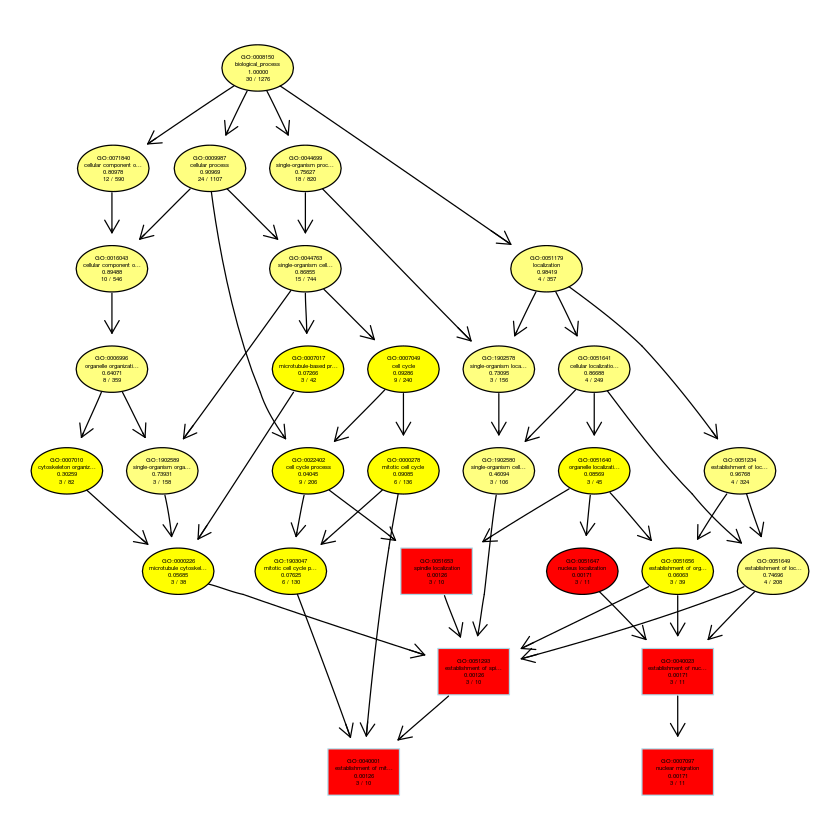

In [18]:
showSigOfNodes(GOdata2, score(resultFisher2), firstSigNodes = 5, useInfo ='all')

In [22]:
printGraph(GOdata, resultFisher, firstSigNodes = 5, fn.prefix = "tGO", useInfo = "all", pdfSW = TRUE)

tGO_classic_5_all  --- no of nodes:  29 


In [21]:
printGraph(GOdata2, resultFisher2, firstSigNodes = 5, fn.prefix = "tGO", useInfo = "all", pdfSW = TRUE)

tGO_classic_5_all  --- no of nodes:  29 


In [40]:
g1 <- names(score(resultFisher)[score(resultFisher) < 0.05])
g2 <- names(score(resultFisher2)[score(resultFisher2) < 0.05])

In [24]:
source("https://bioconductor.org/biocLite.R")
biocLite("GOSemSim")

Bioconductor version 3.4 (BiocInstaller 1.24.0), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.4 (BiocInstaller 1.24.0), R 3.3.2 (2016-10-31).
Installing package(s) ‘GOSemSim’
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Old packages: 'backports', 'broom', 'colorspace', 'data.table', 'digest',
  'forcats', 'ggplot2', 'jsonlite', 'Matrix', 'mgcv', 'nlme', 'openssl',
  'pbdZMQ', 'psych', 'Rcpp', 'rprojroot', 'selectr', 'shiny', 'stringr',
  'tidyr', 'tidyverse', 'xml2', 'zoo'


In [26]:
library(GOSemSim)
scGO <- godata('org.Sc.sgd.db', ont="BP")

[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."


In [49]:
semSim <- mgoSim(g1, g2, semData=scGO, measure="Wang", combine=NULL)
mean(semSim)

In [51]:
semSim

,GO:0000184,GO:0000469,GO:0000724,GO:0000725,GO:0000731,GO:0006090,GO:0006163,GO:0006165,GO:0006275,GO:0006301,⋯,GO:0043144,GO:0043628,GO:0044786,GO:0045003,GO:0046939,GO:0051293,GO:0051345,GO:0051647,GO:0051653,GO:0071824
GO:0006081,0.252,0.269,0.463,0.483,0.372,0.627,0.445,0.451,0.206,0.503,⋯,0.300,0.300,0.445,0.465,0.480,0.215,0.137,0.092,0.325,0.197
GO:0006082,0.243,0.261,0.439,0.460,0.356,0.776,0.483,0.490,0.200,0.479,⋯,0.288,0.288,0.424,0.440,0.521,0.208,0.131,0.087,0.311,0.186
GO:0006732,0.196,0.213,0.218,0.229,0.170,0.320,0.218,0.210,0.155,0.240,⋯,0.242,0.242,0.208,0.220,0.230,0.100,0.150,0.113,0.159,0.238
GO:0006766,0.087,0.095,0.229,0.242,0.174,0.428,0.273,0.287,0.072,0.254,⋯,0.108,0.108,0.232,0.230,0.306,0.100,0.150,0.113,0.159,0.106
GO:0006767,0.074,0.082,0.201,0.215,0.152,0.361,0.236,0.247,0.063,0.226,⋯,0.092,0.092,0.207,0.199,0.263,0.088,0.131,0.099,0.140,0.092
GO:0006790,0.236,0.250,0.254,0.263,0.198,0.384,0.252,0.248,0.181,0.277,⋯,0.289,0.289,0.241,0.260,0.270,0.115,0.174,0.133,0.183,0.278
GO:0006887,0.066,0.072,0.176,0.188,0.141,0.213,0.161,0.164,0.056,0.195,⋯,0.078,0.078,0.169,0.172,0.172,0.407,0.047,0.227,0.431,0.145
GO:0006888,0.022,0.026,0.065,0.071,0.051,0.076,0.058,0.059,0.021,0.074,⋯,0.028,0.028,0.068,0.062,0.062,0.292,0.039,0.215,0.274,0.056
GO:0007568,0.047,0.049,0.118,0.123,0.090,0.171,0.107,0.112,0.037,0.129,⋯,0.057,0.057,0.118,0.120,0.120,0.115,0.077,0.133,0.183,0.123
GO:0009064,0.218,0.242,0.342,0.371,0.288,0.583,0.435,0.368,0.192,0.386,⋯,0.258,0.258,0.333,0.330,0.391,0.129,0.100,0.067,0.200,0.126
